# Micro-Project #1: Prepare and Explore Data
In this section, we load and prepare the Car Evaluation dataset using Pandas and NumPy.  
We explore feature types, check for missing or duplicate values, and review the distribution of key variables to ensure data readiness for future analysis.

In [1]:
# Import necessary libraries
# Pandas is used for data loading and manipulation
import pandas as pd

# Load the Car Evaluation dataset from CSV file
df = pd.read_csv("cars.csv")

# Preview the first 5 rows of the dataset
# This helps verify that the data loaded correctly and allows a first look at structure
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [2]:
# Display the structure and summary of the dataset
# This shows how many rows/columns there are, the column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [3]:
# View summary statistics for all categorical (object-type) columns
# This reveals the number of unique values per feature and their most common category
df.describe(include='object')

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [4]:
# Check for missing values in the dataset
# A clean dataset with zero missing values means we can skip imputation for now
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
# Check for duplicate rows in the dataset
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [6]:
# Import NumPy for numerical operations
import numpy as np

# Use NumPy to extract and display unique values in the target column ('class')
# This confirms the classification labels we’ll be working with later
unique_classes = np.unique(df['class'])
print("Unique classes in the target variable:", unique_classes)

Unique classes in the target variable: ['acc' 'good' 'unacc' 'vgood']


In [7]:
# Explore the distribution of the target variable ('class')
# Helps us check for class imbalance, which is important for model fairness later
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [8]:
# Review value distribution for each feature
for col in df.columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Value counts for 'buying':
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Value counts for 'maint':
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Value counts for 'doors':
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

Value counts for 'persons':
persons
2       576
4       576
more    576
Name: count, dtype: int64

Value counts for 'lug_boot':
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

Value counts for 'safety':
safety
low     576
med     576
high    576
Name: count, dtype: int64

Value counts for 'class':
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [9]:
# Convert all columns to 'category' data type
# This saves memory and reinforces that these are categorical features, not continuous
cat_cols = df.columns
df[cat_cols] = df[cat_cols].astype('category')

# Confirm updated data types
df.dtypes

buying      category
maint       category
doors       category
persons     category
lug_boot    category
safety      category
class       category
dtype: object

# Micro-Project #2: Visualize Data
In this section, we perform visual exploration of the car dataset using count plots to identify patterns related to car acceptability.

In [10]:
# Suppress warnings for cleaner output in notebook
import warnings
warnings.filterwarnings('ignore')

# Simplify class labels into binary groups for clearer patterns
df['class_binary'] = df['class'].replace({
    'unacc': 'unacceptable',
    'acc': 'acceptable',
    'good': 'acceptable',
    'vgood': 'acceptable'
})

# Check the distribution of the new binary class variable
df['class_binary'].value_counts()

class_binary
unacceptable    1210
acceptable       518
Name: count, dtype: int64

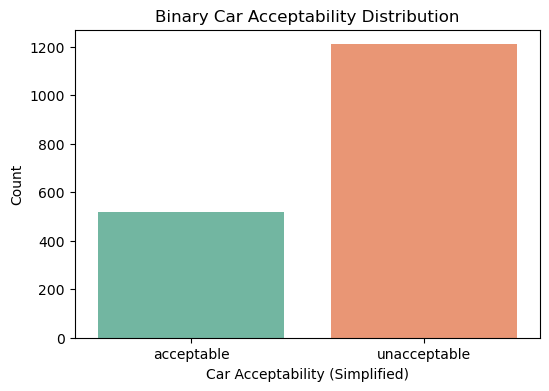

In [11]:
# Plot: Distribution of simplified binary class labels
import matplotlib.pyplot as plt
import seaborn as sns

# Ensures that all plots render inline within the notebook (specific to Jupyter)
%matplotlib inline

plt.figure(figsize=(6, 4))
sns.countplot(x='class_binary', data=df, palette='Set2')
plt.title('Binary Car Acceptability Distribution')
plt.xlabel('Car Acceptability (Simplified)')
plt.ylabel('Count')
plt.show()

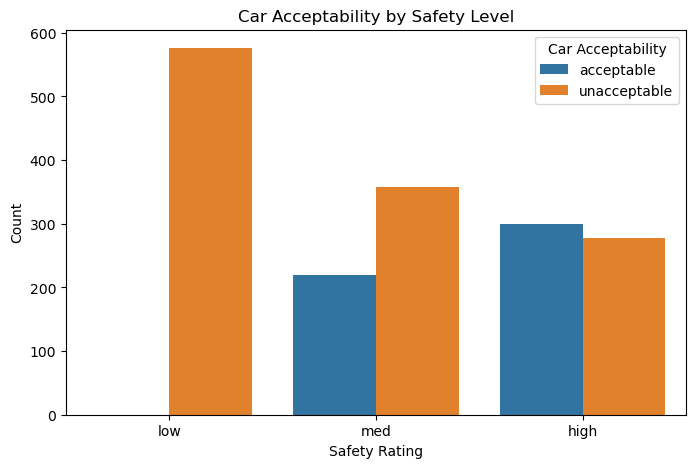

In [12]:
# Plot: Safety vs. Binary Class
plt.figure(figsize=(8, 5))
sns.countplot(x='safety', hue='class_binary', data=df, order=['low', 'med', 'high'])
plt.title('Car Acceptability by Safety Level')
plt.xlabel('Safety Rating')
plt.ylabel('Count')
plt.legend(title='Car Acceptability')
plt.show()

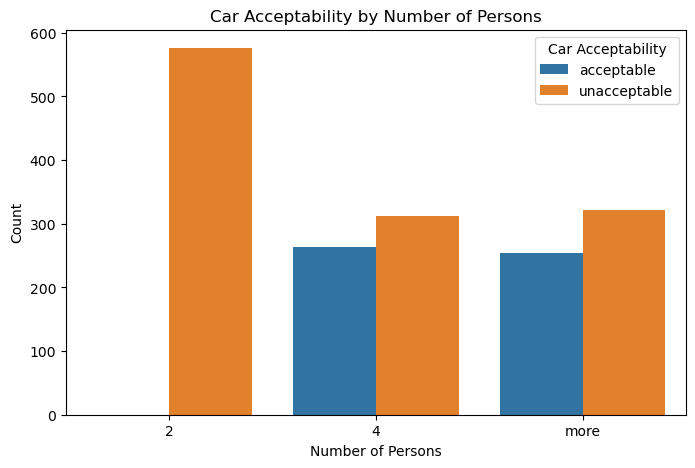

In [13]:
# Plot: Persons vs. Binary Class
plt.figure(figsize=(8, 5))
sns.countplot(x='persons', hue='class_binary', data=df)
plt.title('Car Acceptability by Number of Persons')
plt.xlabel('Number of Persons')
plt.ylabel('Count')
plt.legend(title='Car Acceptability')
plt.show()

**Note:** Some categorical features like `safety`, `buying`, and `maint` follow ordinal scales (e.g., low → high). These may be encoded numerically in future modeling tasks for better performance.